<a href="https://colab.research.google.com/github/AlexsanderProgrammer/AlexsanderProgrammer/blob/main/Anomalias_Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
!pip install numpy==1.20

In [ ]:
!pip install numba==0.53

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

In [ ]:
#Verifica datasets
from pycaret.datasets import get_data
#all_datasets = get_data('index')

In [ ]:
#seleciona o dataset
df = get_data('anomaly')
df.head()

In [ ]:
#Análise do dataset
df.info()

In [ ]:
#Análise estatistica
df.describe()

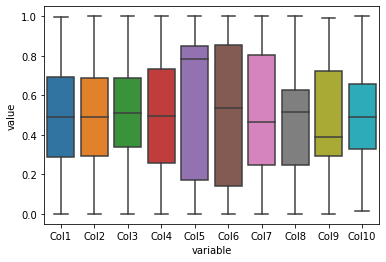

In [ ]:
#Analise gráfica
sns.boxplot(x='variable', y='value', data=pd.melt(df))

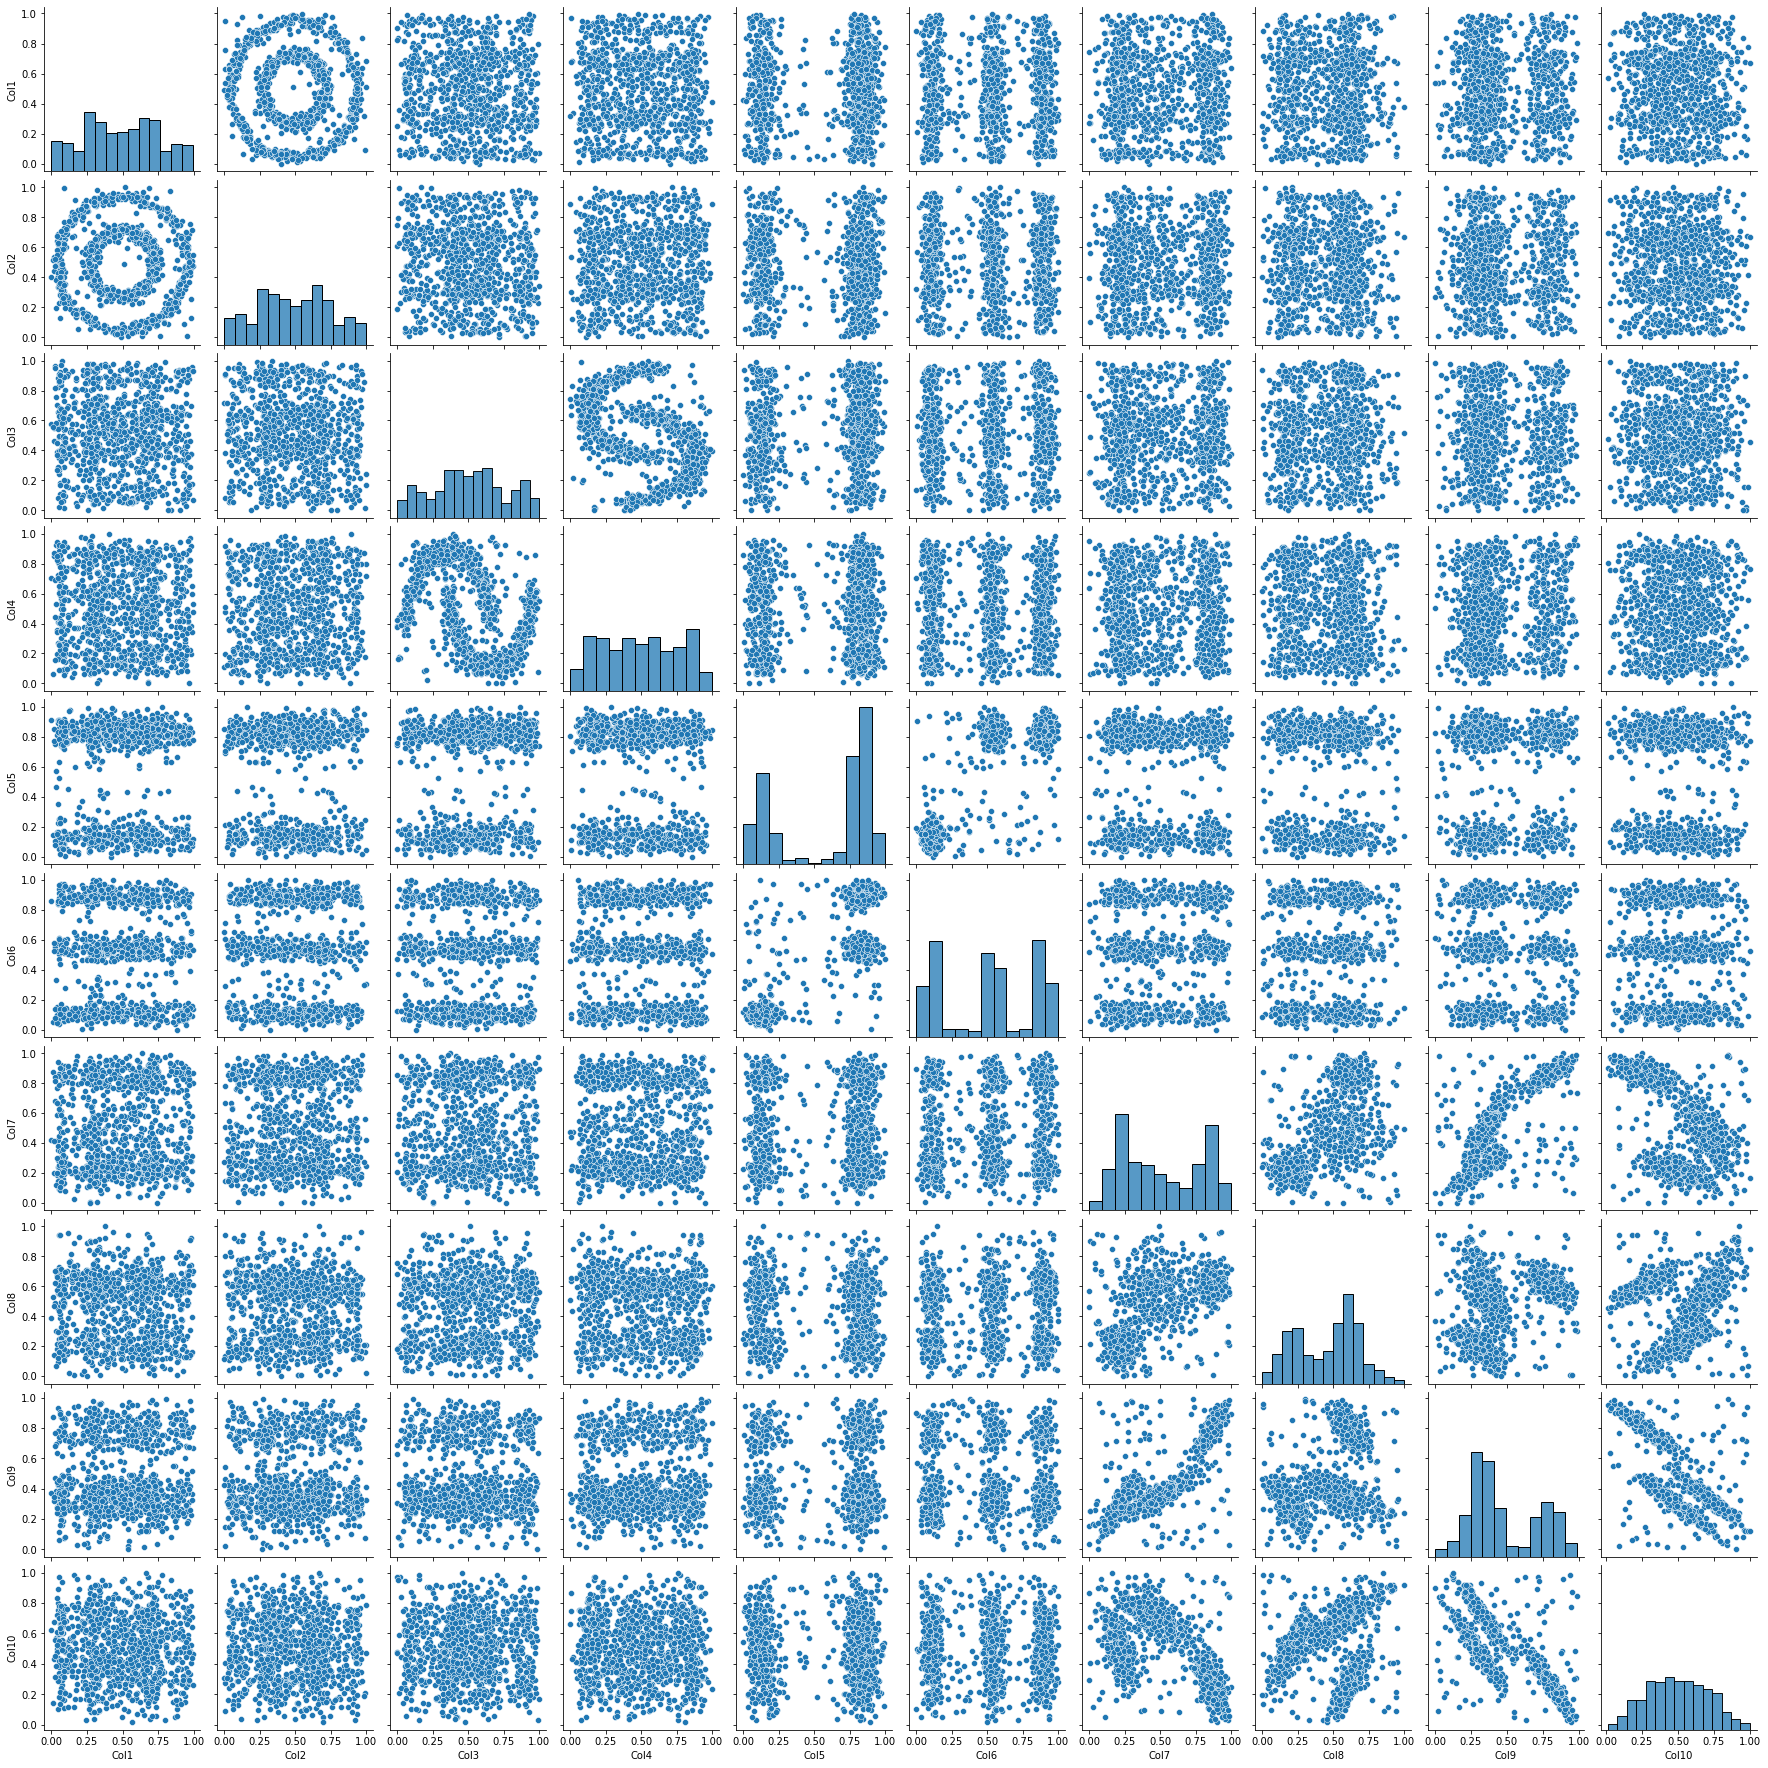

In [ ]:
#Análise gráfica
sns.pairplot(df)

In [ ]:
#Configuração de Processamento para detecção de anomálias
from pycaret.anomaly import *
setup = setup(df,session_id=123)

In [ ]:
#Verificando todos modelos disponiveis
models()

INFO:logs:gpu_param set to False


Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [ ]:
#Algoritimo
iforest = create_model('iforest')
print(iforest)

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)
INFO:logs:create_model() succesfully completed......................................


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
#Algoritimo
lof = create_model('lof')
print(lof)

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)
INFO:logs:create_model() succesfully completed......................................


LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2)


In [ ]:
#Algoritimo
knn = create_model('knn')
print(knn)

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)
INFO:logs:create_model() succesfully completed......................................


KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0)


In [ ]:
#Resultado com iforst
iforest_results = assign_model(iforest)
iforest_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Isolation Forest
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0      -0.035865  
1  0.331679  0.429297  0.367422        0      -0.084927  
2  0.861309  0.899017  0.088600        1       0.025356  
3  0.158963  0.073715  0.208463        1       0.042415  
4  0.558449  0.885169  0.182754        0      -0.023408

In [ ]:
#Resultado com lof
lof_results = assign_model(lof)
lof_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LOF(algorithm='auto', contamination=0.05, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=-1, n_neighbors=20, novelty=True, p=2), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : Local Outlier Factor
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0       1.262565  
1  0.331679  0.429297  0.367422        0       1.043429  
2  0.861309  0.899017  0.088600        0       1.331218  
3  0.158963  0.073715  0.208463        1       1.591832  
4  0.558449  0.885169  0.182754        0       1.223609

In [ ]:
#Resultado com knn
knn_results = assign_model(knn)
knn_results.head()

INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
  radius=1.0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Nearest Neighbors Detector
INFO:logs:Copying data
INFO:logs:(1000, 12)
INFO:logs:assign_model() succesfully completed......................................


Col1      Col2      Col3      Col4      Col5      Col6      Col7  \
0  0.263995  0.764929  0.138424  0.935242  0.605867  0.518790  0.912225   
1  0.546092  0.653975  0.065575  0.227772  0.845269  0.837066  0.272379   
2  0.336714  0.538842  0.192801  0.553563  0.074515  0.332993  0.365792   
3  0.092108  0.995017  0.014465  0.176371  0.241530  0.514724  0.562208   
4  0.325261  0.805968  0.957033  0.331665  0.307923  0.355315  0.501899   

       Col8      Col9     Col10  Anomaly  Anomaly_Score  
0  0.608234  0.723782  0.733591        0       0.569672  
1  0.331679  0.429297  0.367422        0       0.484217  
2  0.861309  0.899017  0.088600        1       0.691915  
3  0.158963  0.073715  0.208463        1       0.811600  
4  0.558449  0.885169  0.182754        0       0.634337

In [ ]:
#Análise das anomalias
iforest_anomaly = iforest_results[iforest_results['Anomaly']==1]
iforest_anomaly.shape

(50, 12)

In [ ]:
#Análise das anomalias
lof_anomaly = lof_results[lof_results['Anomaly']==1]
lof_anomaly.shape

(50, 12)

In [ ]:
#Análise das anomalias
knn_anomaly = knn_results[knn_results['Anomaly']==1]
knn_anomaly.shape

(50, 12)

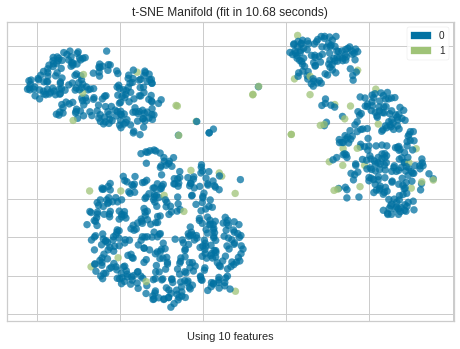

In [ ]:
#Análise gráfica das anomalias do iforest
from yellowbrick.features import Manifold
dfr = iforest_results['Anomaly']
viz = Manifold(manifold='tsne')
viz.fit_transform(df,dfr)
viz.show()

In [ ]:
#plot 3D do modelo
plot_model(iforest)

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


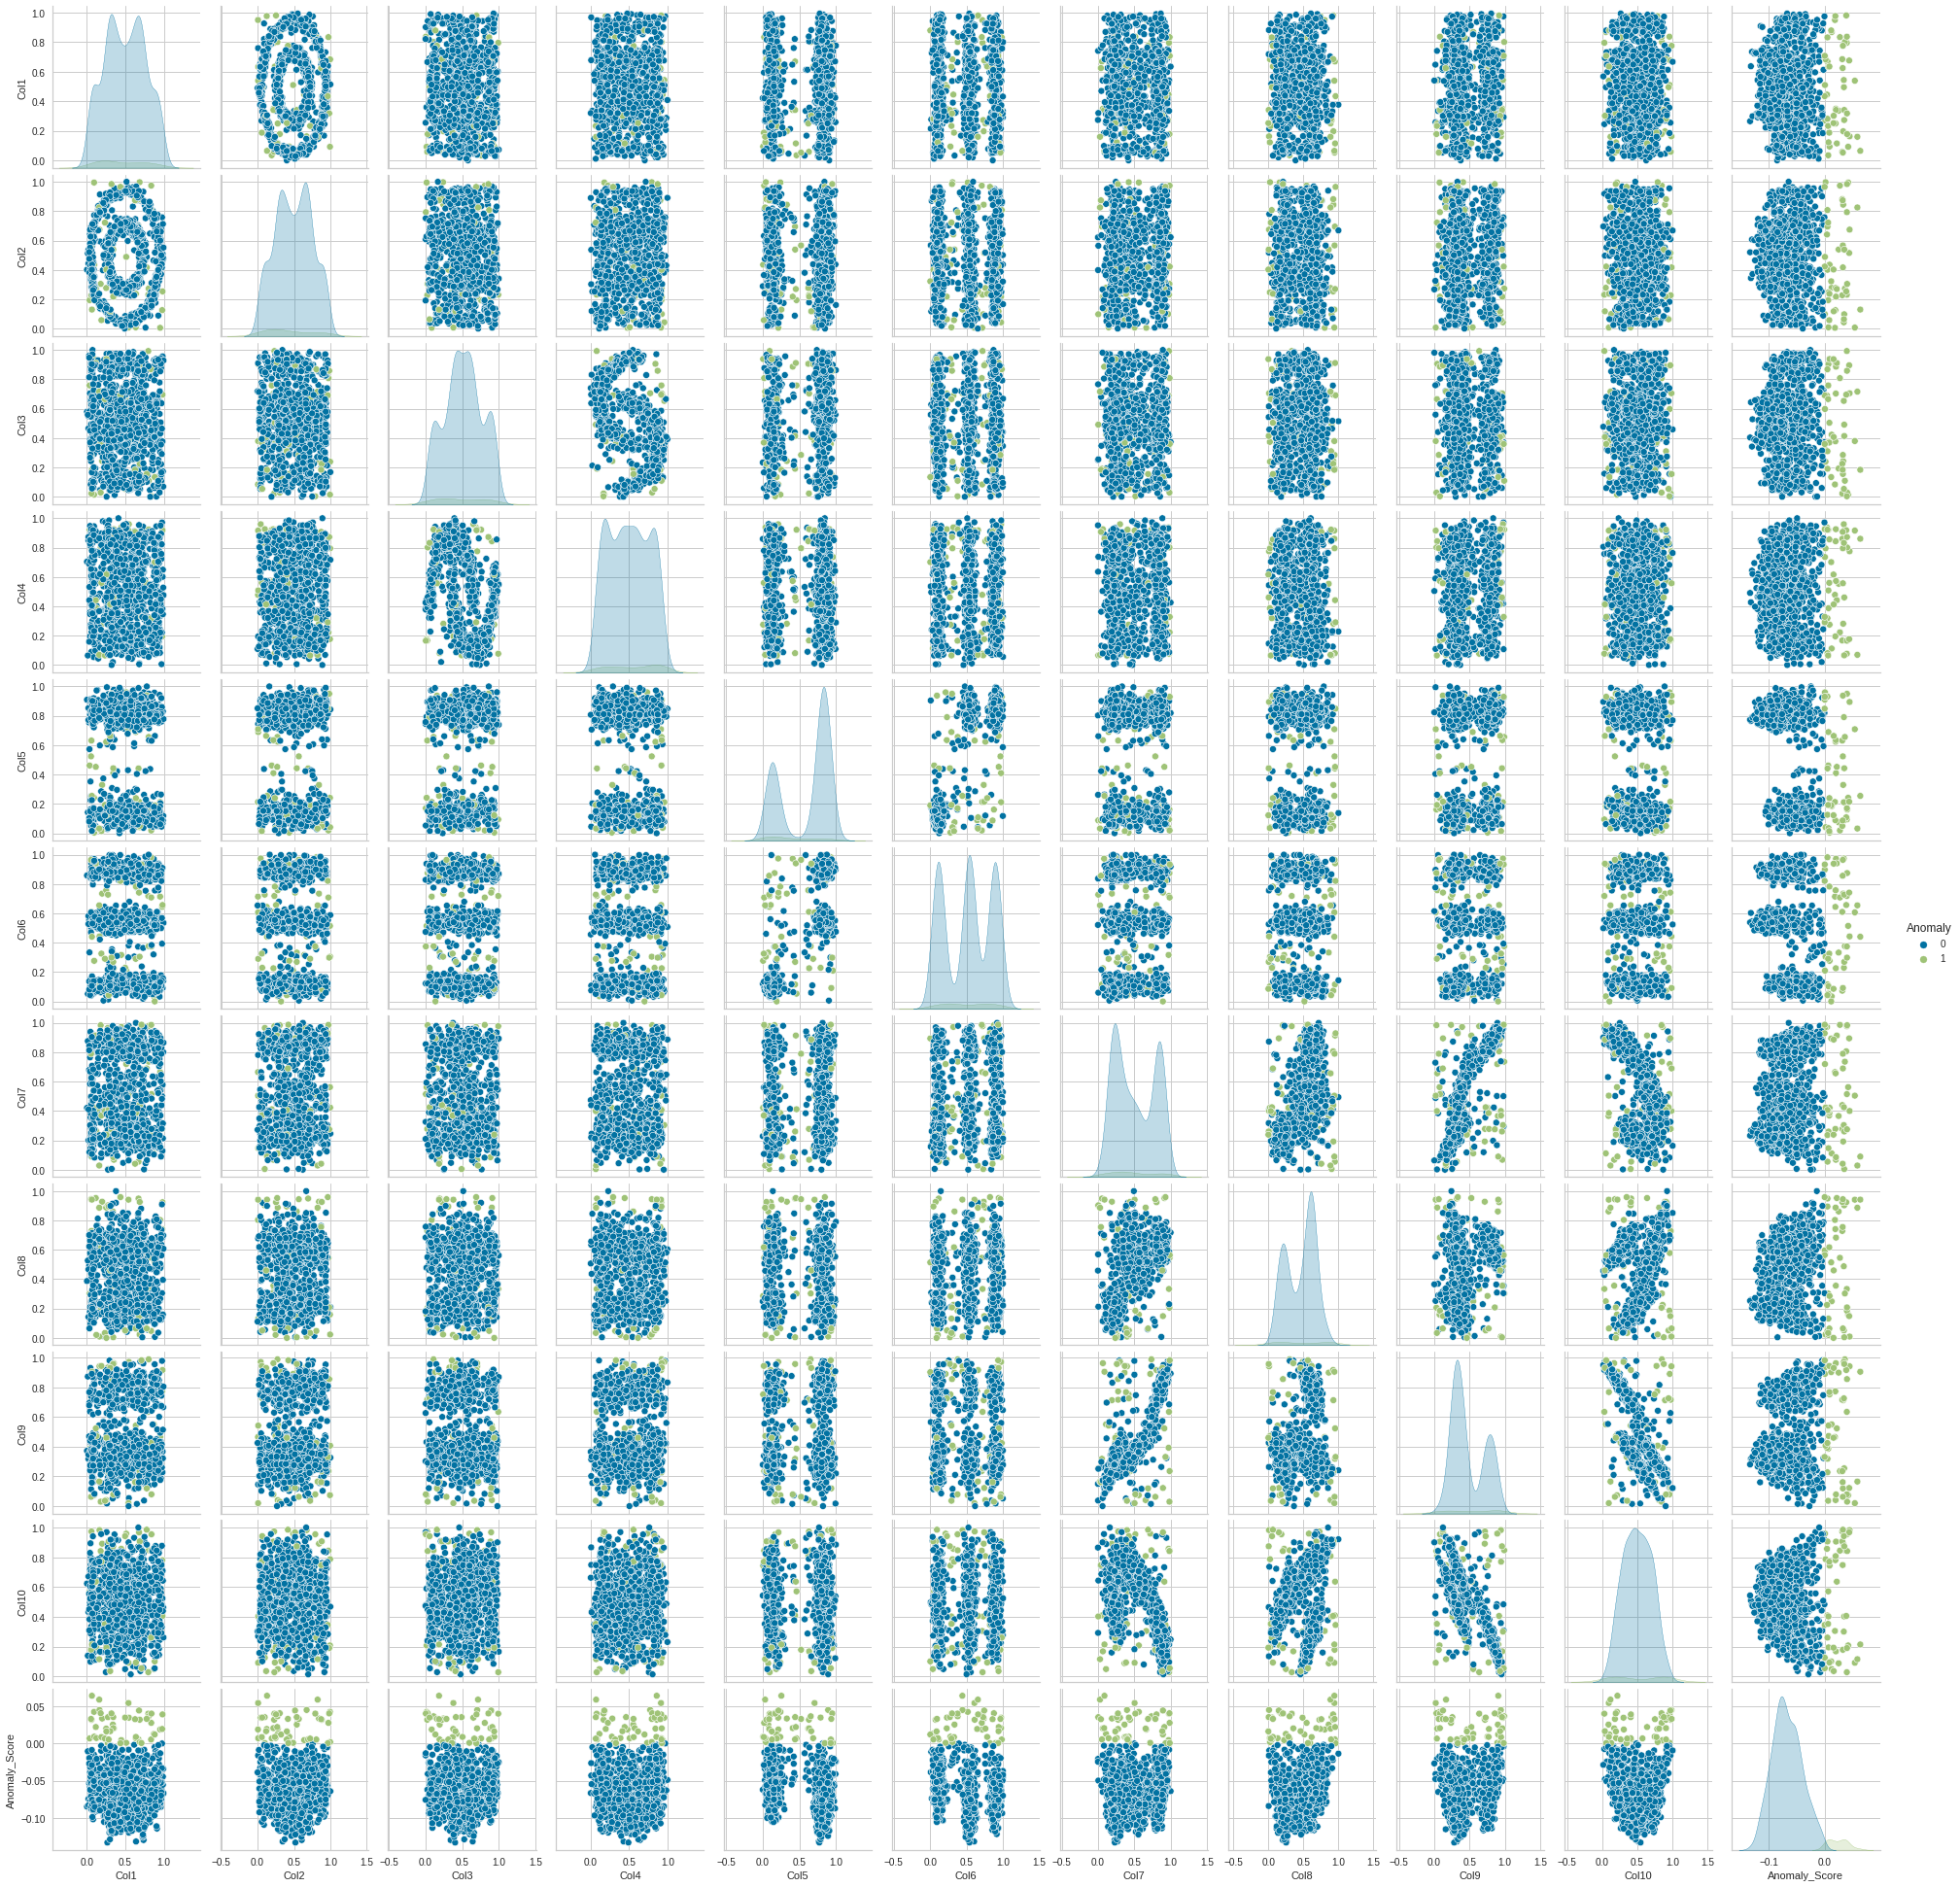

In [ ]:
#Pairplot com as features e as anomalias
sns.pairplot(iforest_results, hue = 'Anomaly')

In [ ]:
#Salvando o modelo
save_model = (iforest, 'Iforest_Model')